# Dike Model Analysis

In [10]:
# import libraries
from ema_workbench import load_results
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
from ema_workbench.analysis import prim

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

## Visual Analysis

In [158]:
experiments, outcomes = load_results('./results/openexplor_problem2.tar.gz')

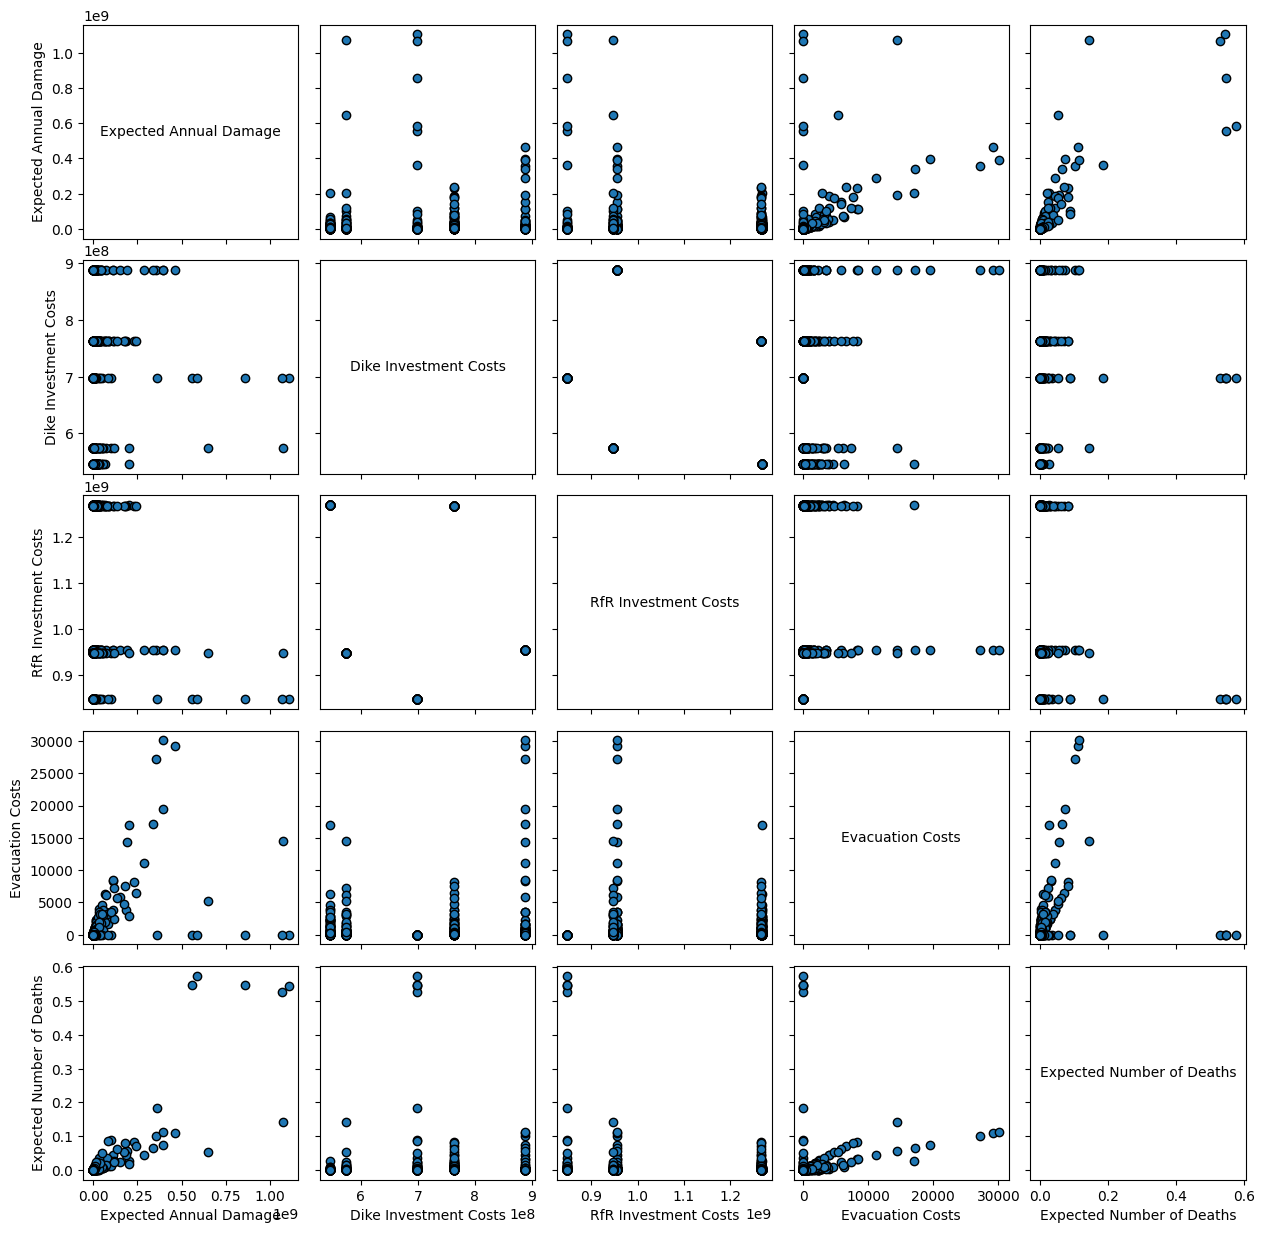

In [159]:
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

Interpretation of figure: There is a small trade-off between evacuation costs and expected annual damage

## Scenario discovery

In [ ]:
experiments, outcomes = load_results('./results/prim_problem2b.tar.gz')

In [140]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,20,273.642633,1.5,0.481290,244.401520,1.0,0.423656,265.960333,1.5,0.863717,...,7,10,9,7,10,9,2,5,0,dikesnet
1,110,180.557671,1.0,0.046704,138.598953,1.0,0.180279,115.752933,1.5,0.846896,...,7,10,9,7,10,9,2,6,0,dikesnet
2,16,203.978758,10.0,0.133540,330.687740,1.5,0.888561,206.767167,1.5,0.724743,...,7,10,9,7,10,9,2,7,0,dikesnet
3,97,75.659476,1.0,0.412313,270.011642,1.5,0.668704,87.489663,10.0,0.516857,...,7,10,9,7,10,9,2,8,0,dikesnet
4,50,331.433173,10.0,0.334577,267.675573,1.5,0.729084,315.464150,10.0,0.507739,...,7,10,9,7,10,9,2,9,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,348.196467,1.0,0.778024,165.572592,1.0,0.462418,270.421790,1.5,0.193106,...,5,2,6,3,6,6,1,1000,4,dikesnet
4996,77,274.276733,1.0,0.801271,318.096433,1.0,0.144388,283.566065,1.0,0.993913,...,5,2,6,3,6,6,1,1001,4,dikesnet
4997,16,136.552687,1.5,0.255778,50.301572,10.0,0.676236,167.130909,1.0,0.309667,...,5,2,6,3,6,6,1,1002,4,dikesnet
4998,73,141.544300,10.0,0.349700,261.050882,1.5,0.159035,36.703858,1.0,0.308561,...,5,2,6,3,6,6,1,1003,4,dikesnet


In [141]:
# clean up experiments
X = experiments.iloc[:, 0:50]

In [142]:
outcomes.keys()

dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths'])

In [147]:
outcome_to_study = 'Dike Investment Costs'
percentile = 50

In [148]:
# Calculate the threshold
threshold = np.percentile(outcomes[outcome_to_study], percentile) 
# Show threshold
print(f"The threshold for {percentile}% worst outcomes for {outcome_to_study} equals {threshold}.")

The threshold for 50% worst outcomes for Dike Investment Costs equals 689748936.810928.


In [149]:
# Get column to optimise
opt = outcomes[outcome_to_study]
# To dataframe
opt = pd.DataFrame(opt)

In [150]:
opt

,0
0,7.823143e+08
1,7.823143e+08
2,7.823143e+08
3,7.823143e+08
4,7.823143e+08
...,...
4995,6.897489e+08
4996,6.897489e+08
4997,6.897489e+08
4998,6.897489e+08


In [151]:
opt[outcome_to_study] = np.where(opt[0] < threshold, 1, 0)

In [152]:
opt

,0,Dike Investment Costs
0,7.823143e+08,0
1,7.823143e+08,0
2,7.823143e+08,0
3,7.823143e+08,0
4,7.823143e+08,0
...,...,...
4995,6.897489e+08,0
4996,6.897489e+08,0
4997,6.897489e+08,0
4998,6.897489e+08,0


In [153]:
y = opt[outcome_to_study].to_numpy()

In [154]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [155]:
# Define PRIM
sd_alg = prim.Prim(x=X, y=y, threshold=0.8, peel_alpha=0.1)

In [156]:
box = sd_alg.find_box()

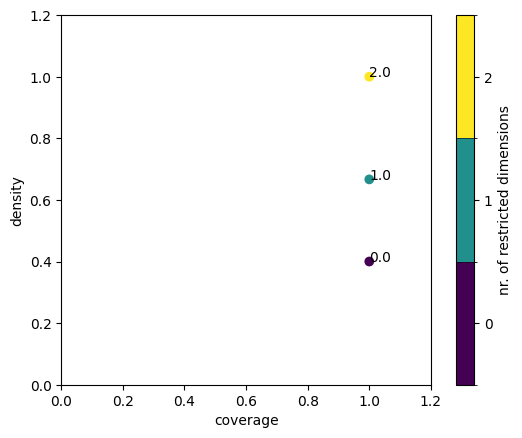

In [157]:
box.show_tradeoff(annotated=True)
plt.show()

In [136]:
point_to_study = 6

In [137]:
box.inspect(point_to_study)

coverage       0.61080
density        0.98899
id             6.00000
k           1527.00000
mass           0.30880
mean           0.98899
n           1544.00000
res_dim        5.00000
Name: 6, dtype: float64

              box 6                                 
                min       max      qp value qp value
0_RfR 2    0.000000  0.000000           NaN      0.0
A.3_pfail  0.102257  0.999813  2.878923e-19      NaN
A.2_pfail  0.050381  0.999432  6.455393e-11      NaN
A.4_pfail  0.052125  0.999762  3.505592e-03      NaN
A.1_pfail  0.050373  0.999513  2.098015e-02      NaN



[None]

Interpretation:  There are clusters of points (boxes) with varying coverage and density.\
For instance, the cluster on the left has lower coverage but higher density and a high number of restricted dimensions.\
Besides, The cluster on the right has higher coverage but slightly lower density and a lower number of restricted dimensions.\

**Notes**:\
Coverage = of all the datapoints, how many are in your final box?\
Density = of all the datapoints in your final box, how many are you interested in?\
Ideally: maximise coverage, maximise density, minimise dimensions
